# Question 1

## 1. Find who has most mails

In [1]:
import glob
import csv
import nltk
import os

In [2]:
path = '../midterm/data/enron/maildir/'

In [3]:
all_mail_dict={}                                  #read all the mails of each user
for name in os.listdir(path):
    total = sum(len(files) for root, dirs, files in os.walk(path+name))   
    all_mail_dict.update({name:total})

In [4]:
sorted_all_mail_dict = sorted(all_mail_dict.items(), key=lambda item: item[1], reverse = True) #sort list

In [5]:
sorted_all_mail_dict[:10]

[('kaminski-v', 28465),
 ('dasovich-j', 28234),
 ('kean-s', 25351),
 ('mann-k', 23381),
 ('jones-t', 19950),
 ('shackleton-s', 18687),
 ('taylor-m', 13875),
 ('farmer-d', 13032),
 ('germany-c', 12436),
 ('beck-s', 11830)]

In [6]:
sorted_mail_list = []
a = 1
for item in sorted_all_mail_dict:
    item = list(item)
    item.insert(0,a)
    a = a +1
    sorted_mail_list.append(item)   

In [7]:
with open('mail_list.csv','w',newline='',encoding="utf-8") as f:    #please review mail_list.csv to check mail amount detail
        w = csv.writer(f)
        w.writerow(['Rank','Email_name','Amount'])
        w.writerows(sorted_mail_list)

## 2. Dig into top 5 mail-holders

In [8]:
from collections import Counter

In [9]:
def activity_year(path):    #get email amount of each person
    mail_list = []
    for dirpath, dirs, files in os.walk(path):
        for filename in files:
            mail_list.append(list(open(os.path.join(dirpath, filename))))
    time_list = []
    for item in mail_list:
        time_list.append(item[1])
    new_time_list = []
    for item in time_list:
        item = item.split(' ')
        new_time_list.append(item)
    year_list = []
    for item in new_time_list:
        year_list.extend([item[4]])
    year_dict = dict(Counter(year_list))
    return year_dict

In [10]:
kaminski_year_dict = activity_year(path+'kaminski-v')  #get kaminski`s
kaminski_year_dict

{'1979': 25, '1999': 417, '2000': 16249, '2001': 10842, '2002': 931, '2005': 1}

In [11]:
dasovich_year_dict = activity_year(path+'dasovich-j')

In [12]:
del dasovich_year_dict['0001']                        #get dasovich`s
dasovich_year_dict

{'1979': 6, '1998': 2, '1999': 568, '2000': 9295, '2001': 18345, '2002': 15}

In [13]:
kean_year_dict = activity_year(path+'kean-s')

In [14]:
del kean_year_dict['0001']                        #get kean`s
kean_year_dict

{'1979': 102, '1997': 436, '1999': 636, '2000': 11446, '2001': 12708}

In [15]:
mann_year_dict = activity_year(path+'mann-k')

In [16]:
del mann_year_dict['0001']                     #get mann`s
mann_year_dict

{'1979': 38, '2000': 9761, '2001': 13574, '2002': 4}

In [17]:
jones_year_dict = activity_year(path+'jones-t')     #get jones`
jones_year_dict 

{'1979': 7, '1999': 1252, '2000': 10721, '2001': 7970}

In [18]:
import matplotlib.pylab as plt

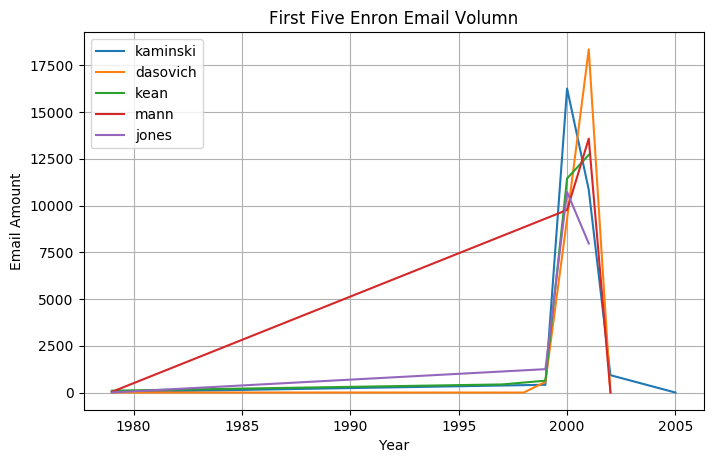

In [19]:
fig = plt.figure(figsize=(8, 5), dpi=100)

lists_kaminski = sorted(kaminski_year_dict.items()) # sorted by key, return a list of tuples
x1, y1 = zip(*lists_kaminski)# unpack a list of pairs into two tuples

lists_dasovich = sorted(dasovich_year_dict.items()) 
x2, y2 = zip(*lists_dasovich)

lists_kean = sorted(kean_year_dict.items()) 
x3, y3 = zip(*lists_kean)

lists_mann = sorted(mann_year_dict.items()) 
x4, y4 = zip(*lists_mann)

lists_jones = sorted(jones_year_dict.items()) 
x5, y5 = zip(*lists_jones)

plt.xlabel('Year')
plt.ylabel('Email Amount')
plt.title('First Five Enron Email Volumn')
plt.grid(True)

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)

plt.legend(['kaminski', 'dasovich','kean','mann','jones'], loc='upper left')
plt.show()